## Assignment

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## Status

Jeg har lavet hvad jeg kunne, har fået en masse irriterende fejl, som jeg ikke har kunnet fikse - f.eks. får jeg NaN hele tiden i mine dataframes og føler jeg har prøvet alt efterhånden. 

Har lavet A, men B og C har fejl og mangler, som jeg ikke har kunnet fikse. asd asd

## Solution

In [1]:
import numpy as np
import pandas as pd
url = 'https://api.statbank.dk/v1/data/Folk1a/CSV?valuePresentation=Value&delimiter=Semicolon&CIVILSTAND=F&Tid=*'
df = pd.read_csv(url, sep=';')

df

,CIVILSTAND,TID,INDHOLD
0,Fraskilt,2008K1,428864
1,Fraskilt,2008K2,431550
2,Fraskilt,2008K3,432713
3,Fraskilt,2008K4,432156
4,Fraskilt,2009K1,434233
5,Fraskilt,2009K2,437466
6,Fraskilt,2009K3,439378
7,Fraskilt,2009K4,439428
8,Fraskilt,2010K1,441913
9,Fraskilt,2010K2,444765


In [2]:
#percentchange = (df['INDHOLD'] / df['INDHOLD'].sum()) * 100 #Denne viser procentfordelingen i stedet
antal_mask = df['INDHOLD']
#percentchange
antal_mask.pct_change().sum() * 100

25.901021353966193

In [3]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&CIVILSTAND=TOT%2CU&Tid=2020K4&OMR%C3%85DE=084%2C085%2C082%2C083%2C081'
df = pd.read_csv(url, sep=';')
df

,CIVILSTAND,TID,OMRÅDE,INDHOLD
0,I alt,2020K4,Region Hovedstaden,1854296
1,I alt,2020K4,Region Sjælland,838129
2,I alt,2020K4,Region Midtjylland,1330866
3,I alt,2020K4,Region Syddanmark,1223183
4,I alt,2020K4,Region Nordjylland,590739
5,Ugift,2020K4,Region Hovedstaden,981652
6,Ugift,2020K4,Region Sjælland,369548
7,Ugift,2020K4,Region Midtjylland,657563
8,Ugift,2020K4,Region Syddanmark,568943
9,Ugift,2020K4,Region Nordjylland,281410


In [4]:
# df1 = df.sort_values(by=['OMRÅDE'], ascending=True)
mask_unmarried = df['CIVILSTAND'].isin(['Ugift'])
mask_total = df['CIVILSTAND'].isin(['I alt'])
index_mask = pd.unique(df['OMRÅDE'])
data_chart = pd.DataFrame({'I alt': df[mask_total].iloc[:,-1], 'Ugift': df[mask_unmarried].iloc[:,-1]}, index = index_mask)

#data_chart
df[mask_total]


,CIVILSTAND,TID,OMRÅDE,INDHOLD
0,I alt,2020K4,Region Hovedstaden,1854296
1,I alt,2020K4,Region Sjælland,838129
2,I alt,2020K4,Region Midtjylland,1330866
3,I alt,2020K4,Region Syddanmark,1223183
4,I alt,2020K4,Region Nordjylland,590739


In [5]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG%2CE%2CF&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1'
df = pd.read_csv(url, sep=';')
df

,CIVILSTAND,TID,INDHOLD
0,Ugift,2008K1,2552700
1,Ugift,2009K1,2575185
2,Ugift,2010K1,2593172
3,Ugift,2011K1,2616048
4,Ugift,2012K1,2639530
5,Ugift,2013K1,2662659
6,Ugift,2014K1,2687098
7,Ugift,2015K1,2714540
8,Ugift,2016K1,2753160
9,Ugift,2017K1,2785800


In [87]:
import matplotlib.pyplot as plt
#mask_ugift = df['CIVILSTAND'].isin(['Ugift'])
#mask_gift = df['CIVILSTAND'].isin(['Gift/separeret'])
#mask_enke = df['CIVILSTAND'].isin(['Enke/enkemand'])
#mask_fraskilt = df['CIVILSTAND'].isin(['Fraskilt'])

#data_chart1 = pd.DataFrame({'CIVILSTAND': df['CIVILSTAND'], 'ANTAL': df['INDHOLD'], 'ÅR': df['TID']})
data_chart2 = data_chart1.sort_values(by=['ÅR'], ascending=True)
#data_chart1
data_chart2

,CIVILSTAND,ANTAL,ÅR
0,Ugift,2552700,2008K1
14,Gift/separeret,2176977,2008K1
42,Fraskilt,428864,2008K1
28,Enke/enkemand,317250,2008K1
29,Enke/enkemand,313774,2009K1
15,Gift/separeret,2188259,2009K1
43,Fraskilt,434233,2009K1
1,Ugift,2575185,2009K1
30,Enke/enkemand,310285,2010K1
2,Ugift,2593172,2010K1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

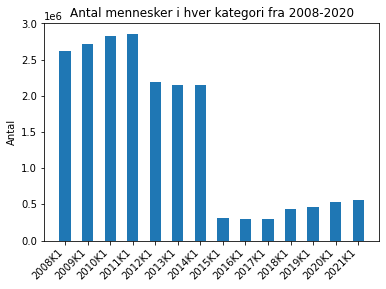

In [92]:
#Kan ikke få noget til at virke som jeg gerne vil have det
#mask = data_chart1['ÅR']
plt.title('Antal mennesker i hver kategori fra 2008-2020')
plt.ylabel('Antal')
#data_chart1.plot.bar(rot=0)
plt.bar(data_chart2['ÅR'], data_chart1['ANTAL'], width=0.5, align=('center'))
#plt.bar(data_chart2['ÅR'], data_chart2['ANTAL'], width=0.5, align=('center'))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')


In [84]:
data_chart2['CIVILSTAND']

0              Ugift
14    Gift/separeret
42          Fraskilt
28     Enke/enkemand
29     Enke/enkemand
15    Gift/separeret
43          Fraskilt
1              Ugift
30     Enke/enkemand
2              Ugift
44          Fraskilt
16    Gift/separeret
31     Enke/enkemand
17    Gift/separeret
45          Fraskilt
3              Ugift
32     Enke/enkemand
18    Gift/separeret
46          Fraskilt
4              Ugift
19    Gift/separeret
47          Fraskilt
33     Enke/enkemand
5              Ugift
20    Gift/separeret
34     Enke/enkemand
48          Fraskilt
6              Ugift
35     Enke/enkemand
21    Gift/separeret
49          Fraskilt
7              Ugift
36     Enke/enkemand
50          Fraskilt
22    Gift/separeret
8              Ugift
37     Enke/enkemand
51          Fraskilt
23    Gift/separeret
9              Ugift
38     Enke/enkemand
52          Fraskilt
24    Gift/separeret
10             Ugift
39     Enke/enkemand
53          Fraskilt
11             Ugift
25    Gift/se